## 单元3 - Test of proportions - 生物医学统计概论 @林关宁

# 卡方分布，卡方检验，Fisher 检验

## 1. 卡方分布

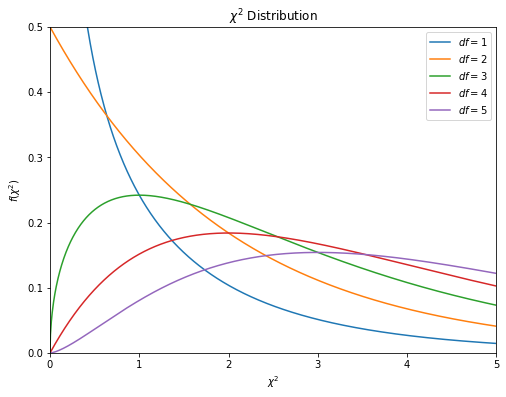

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import math,pylab,matplotlib,numpy
from matplotlib.font_manager import FontProperties
 
#设置中文字体
font=FontProperties(fname=r"c:\windows\fonts\simsun.ttc",size=15)

# chi square distribution with varying degrees of freedom
fig = plt.figure(figsize = (8, 6))
x = np.linspace(0, 5, 1000)
deg_of_freedom = [1, 2, 3, 4, 5]
for df in deg_of_freedom:
    plt.plot(x, stats.chi2.pdf(x, df), label = '$df={}$'.format(df))

plt.xlim(0, 5)
plt.ylim(0, 0.5)
plt.xlabel('$\chi^2$')
plt.ylabel('$f(\chi^2)$')
plt.title('$\chi^2\ \mathrm{Distribution}$')
plt.legend()
plt.show()

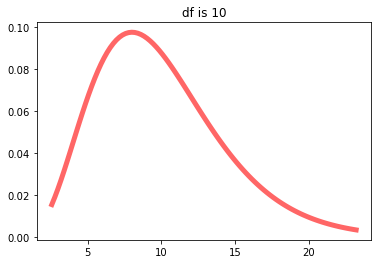

In [6]:
from scipy.stats import chi2
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1)
 
df =10 # 可手动调整自由度看看卡方分布的转态
mean, var, skew, kurt = chi2.stats(df, moments='mvsk')
 
#绘制函数的起始点和终止点
#pdf为概率密度函数
#百分比函数(PPF) :the inverse of the CDF. PPF  函数和连续分布函数CDF相逆，
#比如输入哪一个点，可以得到低于等于20的概率？
#ppf(0.01, df)表示输入哪个点，得到概率低于0.01
initial=chi2.ppf(0.01, df)
end=chi2.ppf(0.99, df)
x = np.linspace(initial,end, 100)
 
#概率密度函数用于绘图
ax.plot(x, chi2.pdf(x, df), 'r-', lw=5, alpha=0.6, label='chi2 pdf')
plt.title("df is %d"%df)
plt.show()

# 2. 卡方检验 Chi-Squared tests 

## 2.1. Chi-Squared Goodness-Of-Fit Test

在我们之前对t-检验的研究中，我们引入了单向t-检验（one-way t-test）来检验样本平均值是否与预期（总体）平均值不同。卡方拟合优度检验（Chi-Squared Goodness-Of-Fit Test）类似于用于分类变量的里one-way t-test：它检验样本分类数据的分布是否符合预期分布。

例如，我们可以使用卡方拟合优度测试来检查一个美国大学的学生种族人口统计是否与整个美国人口的种族人口统计相匹配，或者你电脑的浏览器偏好是否与整个互联网使用的电脑浏览器偏好一致，等等。适用于单个样本的检测。

在处理分类数据时，这些数值本身在统计测试中没有多大用处，因为“男性”，“女性”和“其他”等类别没有数学意义。因此处理分类变量的检测时基于变量的计数，而不是变量本身的实际值。

例：我们生成一些虚拟的美国全国和美国的明尼苏达州得人口统计数据，并通过拟合度卡方检验来检查它们是否不同。

In [8]:
import numpy as np
import pandas as pd
import scipy.stats as stats

!pip install -U numpy
!pip install -U pandas

In [9]:
national = pd.DataFrame(["white"]*100000 + ["hispanic"]*60000 +\
                        ["black"]*50000 + ["asian"]*15000 + ["other"]*35000)
           

minnesota = pd.DataFrame(["white"]*600 + ["hispanic"]*300 + \
                         ["black"]*250 +["asian"]*75 + ["other"]*150)

national_table = pd.crosstab(index=national[0], columns="count")
minnesota_table = pd.crosstab(index=minnesota[0], columns="count")

print( "National")
print(national_table)
print(" ")
print( "Minnesota")
print(minnesota_table)

National
col_0      count
0               
asian      15000
black      50000
hispanic   60000
other      35000
white     100000
 
Minnesota
col_0     count
0              
asian        75
black       250
hispanic    300
other       150
white       600


卡方检验是基于所谓的卡方统计。使用以下公式计算卡方统计量：

$sum((observed−expected)^2/expected)$
 
在公式中，observated是每个类别的实际观察计数，expected是基于相应类别的总体分布的预期计数。让我们计算数据的卡方统计来说明：

In [10]:
observed = minnesota_table

national_ratios = national_table/len(national)  # Get population ratios

expected = national_ratios * len(minnesota)   # Get expected counts

chi_squared_stat = (((observed-expected)**2)/expected).sum()

print(chi_squared_stat)

col_0
count    18.194805
dtype: float64


注：卡方检验假定预期计数均不小于5。

与t-检验类似，我们将t-检验统计量与基于t-分布的临界值进行比较以确定结果是否显著，在卡方检验中，我们将卡方检验统计量与基于卡方分布的临界值进行比较。scipy库的chi-square分布的简写是chi2。让我们利用这些信息找出95%置信水平的临界值，并检查结果的p值：

In [27]:
p_value = 1 - stats.chi2.cdf(x=chi_squared_stat,  # Find the p-value
                             df=4) # Df = number of variable categories - 1
print("P value")
print(p_value)

P value
[0.00113047]


由于我们的卡方统计量大于临界值，我们拒绝了两个分布是相同的零假设。

### 你也可以用scipy函数scipy.stats.chisquare（）去自动执行卡方拟合优度测试：

In [12]:
stats.chisquare(f_obs= observed,   # Array of observed counts
                f_exp= expected)   # Array of expected counts

Power_divergenceResult(statistic=array([18.19480519]), pvalue=array([0.00113047]))

##------------------------------------------

## 2.2. Chi-square Test of Independence

#### Data used for this Example
The data used in this example is from Kaggle.com from Open Sourcing Mental Illness, LTD. The data set is from the 2016 OSMI Mental Health in Tech Survey which aims to measure attitudes towards mental health in the tech workplace, and examine the frequency of mental health disorders among tech workers.

本例中使用的数据来自Kaggle。来自开源 Open Sourcing Mental Illness, LTD。该数据集来自2016年OSMI技术领域心理健康调查，该调查旨在测量技术工作场所对心理健康的态度，并检查技术工作者中存在心理健康问题的频率。

In [13]:
#import pandas as pd
from scipy import stats
import researchpy as rp

df = pd.read_csv("Data_mental-heath-in-tech-2016_20161114.csv")

For this example, we will test if there is an association between willingness to discuss a mental health issues with a direct supervisor and currently having a mental health disorder. In the data set, these are variables “Would you have been willing to discuss a mental health issue with your direct supervisor(s)?” and “Do you currently have a mental health disorder?” respectively. Let’s take a look at the data!

在这个案例里，我们将检测：是否“愿意与直接主管讨论心理健康问题”与当前患有心理健康障碍之间存在关联。

在数据集中，这些变量分别是

“你是否愿意与你的直接主管讨论精神健康问题？”

和 “你目前有精神健康问题吗？”

In [14]:
rp.summary_cat(df[['Do you currently have a mental health disorder?', 
                   'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?' ]])

,Variable,Outcome,Count,Percent
0,Do you currently have a mental health disorder?,Yes,575,40.13
1,,No,531,37.06
2,,Maybe,327,22.82
3,Would you have been willing to discuss a menta...,Some of my previous employers,654,51.74
4,,"No, at none of my previous employers",416,32.91
5,,I don't know,101,7.99
6,,"Yes, at all of my previous employers",93,7.36


For the variable “Do you currently have a mental health disorder?”, we are going to drop the responses of “Maybe” since we are only interested in if people know they do or do not have a mental health disorder. In order to do this, we need to use a function to recode the data. In addition, the variables will be renamed to shorten them.

对变量“你现在有精神健康障碍吗？”，我们去掉“也许”这个的回答，因为我们只关心人们是否知道他们患有精神疾病。因此，我们需要使用函数重新编码数据。此外，变量将被重命名以缩短它们的称呼。

In [15]:
def drop_maybe(series):
    if series.lower() == 'yes' or series.lower() == 'no':
        return series
    else:
        return

In [16]:
df['current_mental_disorder'] = df['Do you currently have a mental health disorder?'].apply(drop_maybe)
df['willing_discuss_mh_supervisor'] = df['Would you have been willing to discuss a mental health issue with your direct supervisor(s)?']
    
rp.summary_cat(df[['current_mental_disorder', 'willing_discuss_mh_supervisor']])

,Variable,Outcome,Count,Percent
0,current_mental_disorder,Yes,575,51.99
1,,No,531,48.01
2,willing_discuss_mh_supervisor,Some of my previous employers,654,51.74
3,,"No, at none of my previous employers",416,32.91
4,,I don't know,101,7.99
5,,"Yes, at all of my previous employers",93,7.36


## 2.2.1. Chi-square Test of Independence using scipy

Our data is set, so let’s take a look at the contingency table（crosstab frequencies） of the two groups.

现在数据准备完毕，我们来看下两个groups的列联表:

In [17]:
pd.crosstab(df['willing_discuss_mh_supervisor'], df['current_mental_disorder'])

current_mental_disorder,No,Yes
willing_discuss_mh_supervisor,,
I don't know,51,29
"No, at none of my previous employers",119,194
Some of my previous employers,237,267
"Yes, at all of my previous employers",51,24


You should have already imported Scipy.stats as stats, if you haven’t yet, do so now. The chi2_contingency() method conducts the Chi-square test on a contingency table (crosstab).

需要 “imported Scipy.stats as stats”。它的 chi2_contingency() 方法可以用来做列联表的卡方检验。

In [18]:
crosstab = pd.crosstab(df['willing_discuss_mh_supervisor'], df['current_mental_disorder'])
crosstab

current_mental_disorder,No,Yes
willing_discuss_mh_supervisor,,
I don't know,51,29
"No, at none of my previous employers",119,194
Some of my previous employers,237,267
"Yes, at all of my previous employers",51,24


Now we can simply pass the crosstab variable through the chi2_contingency() method to conduct a Chi-square test of independence. The output doesn’t look neat in formatting, but all the required information is there.

现在，我们只需通过chi2_convention（）方法传递crosstab变量，就可以进行独立性的卡方检验。输出的格式看起来不整洁，但所有必需的信息都在那里。

While we check the results of the chi2 test, we need also to check that the expected cell frequencies are greater than or equal to 5; this is one of the assumptions (as mentioned above) for the chi2 test. If a cell has an expected frequency less that 5, then the Fisher’s Exact test should be use to overcome this problem. Interpretation of the results are the same. This information is also provided in the output.

当我们看 $x^2$ 检测的结果时，我们还需要检查方格里的期望值（频率）是否大于或等于5；这是使用$x^2$ 检测的前提假设之一。如果一个方格的期望频率小于5，那么应该使用Fisher精确测试来解决这个问题。如果使用Fisher精确测试，对结果的解释是一样的。

In [19]:
chi2, p, dof, expctd = stats.chi2_contingency(crosstab)

print("chi-square is "+ str(chi2))
print("p-value is "+ str(p))
print("degree of freedom is "+ str(dof))
expctd

chi-square is 32.408194625396376
p-value is 4.292859793048239e-07
degree of freedom is 3


array([[ 37.69547325,  42.30452675],
       [147.48353909, 165.51646091],
       [237.48148148, 266.51851852],
       [ 35.33950617,  39.66049383]])

The first value (32.408) is the Chi-square value, followed by the p-value (4.29e-07), then comes the degrees of freedom (3), and lastly it outputs the expected frequencies as an array. Since all of the expected frequencies are greater than 5, the chi2 test results can be trusted. We can reject the null hypothesis as the p-value is less than 0.05. Thus, the results indicate that there is a relationship between willingness to discuss a mental health issues with a direct supervisor and currently having a mental health disorder within the tech/IT workplace.

第一个值（32.408）是卡方值，然后是p值（4.29e-07），然后是自由度（3），最后它作为阵列输出期望频率。由于所有预期频率都大于5，因此可以相信这个 $x^2$ 测试结果。我们可以拒绝零假设，因为p值小于0.05。因此，这个案例的结果表明，与直接主管讨论心理健康问题的意愿和目前在科技/信息技术职场所内存在心理健康障碍之间是存在关系的。

Although our Chi-square test was signficant, since our analysis is 2×3 we can’t yet state exactly where the relationship is since the Chi-square test is an omnibus test. We have to conduct post hoc tests to test where the relationship is between the different levels (categories) of each variable. This example will use the Bonferroni-adjusted p-value method which will be covered in the section after next.

虽然我们的卡方检验是显著的，因为我们的分析的表格是2×3，我们还不能确切地说明关系是哪列和行，因为卡方检验还只是一个综合检验。我们必须进行事后测试（Post-hoc test），以测试每个变量的不同级别（类别）之间的关系。可将使用Bonferroni调整后的p值方法。

## 2.2.2 Chi-square Test of Independence using Researchpy

Researchpy has a nice crosstab method that can do more than just producing cross-tabulation tables and conducting the chi-square test of independence test. Let’s conduct the same analysis and see the cross-tabulation table in terms of column percent. This will allow us to compare the percentages of those with a mental health disorder against those without a mental health disorder. The output comes as a tuple, but for cleanliness, I will store the cross-tabulation table as one object and the results as another object.

Researchpy有一个很好的交叉表分析方法，它不仅可以生成交叉表并进行独立性检验的卡方检验，还可以做更多的事情。我们就用它来做下刚才相同的分析，并以列百分比的形式查看交叉表。这可以让我们能够比较患有精神疾病的人与没有精神疾病的人的百分比。输出以元组的形式出现，但是为了简洁起见，我将交叉列表存储为一个对象，并将结果存储为另一个对象。

In [20]:
table, results = rp.crosstab(df['willing_discuss_mh_supervisor'], 
                             df['current_mental_disorder'], 
                             prop= 'col', 
                             test= 'chi-square')
    
table

current_mental_disorder                
current_mental_disorder                                   No     Yes     All
willing_discuss_mh_supervisor                                               
I don't know                                           11.14    5.64    8.23
No, at none of my previous employers                   25.98   37.74   32.20
Some of my previous employers                          51.75   51.95   51.85
Yes, at all of my previous employers                   11.14    4.67    7.72
All                                                   100.00  100.00  100.00

In [21]:
results

,Chi-square test,results
0,Pearson Chi-square ( 3.0) =,32.4082
1,p-value =,0.0000
2,Cramer's V =,0.1826


In the results table, researchpy's crosstab method also returned Cramer's V which is an effect size measure. This tells how strong the relationship between the two variables are. Let's interpret the results.

在结果表中，researchpy的crosstab方法还返回了Cramer的V，这是一个效应量的度量，可以说明这两个变量之间的关系有多密切。我们具体来看下结果。

There is a statistically significant relationship between having a current mental health disorder and the willingness to discuss mental health with supervisor, $x^2$(3)= 32.4082, p < 0.0001. The strength of that relationship is small, Cramer's V= 0.1826. As mentioned earlier, post-hoc tests need to be conducted in order to see where the difference between the willingness to discuss mental health with supervisor and having a current mental health disorder is since the willingness to discuss mental health variables has 4 groups. Also as mentioned earlier, this example will use the Bonferroni-adjusted p-value method which will be covered in the next section.

当前的心理健康障碍与是否愿意与主管讨论心理健康之间存在统计上的显著关系，$x^2$(3)= 32.4082，p <0.0001。但这种关系的强度不大，Cramer's V = 0.1826。如前所述，还需要进行事后测试，以了解与主管讨论心理健康的意愿和当前患有精神疾病的区别在哪里，因为讨论心理健康变量的意愿有4组，该示例将使用Bonferroni调整的p值方法。

## 2.2.3 Chi-square Test of Independence Post Hoc Testing

既然我们知道我们的独立性卡方检验很重要，同时我们想检验变量水平之间的关系。为了做到这一点，我们需要进行多次2×2卡方检验，再使用经过Bonferroni调整的p值。

你可能会问为什么？通过相互比较多个水平（类别），错误率的假阳性会随着每个测试不断增加。意思是，我们在0.05级的第一个测试是5%的假阳性机会；再测试一次就变成是10%的假阳性机会，以此类推。在随后的每次测试中，错误率将增加5%。如果我们进行所有可能的6对比较，我们最后的2×2卡方检验将有30%的错误率！这意味着我们的p值将等于0.30，这在任何水平上都是不可接受的。

为了避免这种情况，Bonferroni调整方法通过进行多少的成对比较来调整p值。公式为p/N，其中“p”=原始测试p-值，“N”=计划成对比较的次数。

在我们的例子中，如果我们计划进行所有可能的成对比较，那么公式将是0.05/6=0.008。也就是说，事后2×2卡方检验的p值必须小于0.008才能显著。然而，我们对“愿意讨论的主管”变量的“我不知道”类别不感兴趣。因此公式为0.05/3，等于0.017。因此，为了使我们计划的成对比较有意义，p值必须小于0.017。

要进行多个2×2卡方检验，需要将每个检验的变量重新组合到与其他检验相对应的一个类别。对我们来说，这就是：
* No, at none of my previous employers vs. the rest
* Some of my previous employers vs, the rest
* Yes, at all of my previous employers vs. the rest

Python makes this task easy! There is a pd.get_dummies() method which creates dummy variables where each new variable is only one category of the original variable and is equal to “1” if they belong in that category and “0” if they do not. We will assign the dummy variables to a new Python data frame.

Python 使这个任务变得简单！有一个 pd.get_dummies（）方法可以创建虚拟变量，其中每个新变量只是原始变量的一个类别，如果它们属于该类别，则等于“1”；如果它们不属于，则等于“0”。我们将把虚拟变量分配给一个新的Python数据帧。

In [22]:
dummies = pd.get_dummies(df['willing_discuss_mh_supervisor'])
dummies.drop(["I don't know"], axis= 1, inplace= True)
dummies.head()

,"No, at none of my previous employers",Some of my previous employers,"Yes, at all of my previous employers"
0,0,1,0
1,0,1,0
2,0,0,0
3,0,1,0
4,0,1,0


Now that we have our dummy variables set, we can conduct our planned post hoc comparisons. This will be easy using a for loop. There is going to be a bit extra code in the for loop to clean up the output.

现在我们已经设置了虚拟变量，我们可以执行预计的事后比较。使用for循环，for循环中将有一些额外的代码来清理输出。

In [23]:
for series in dummies:
    nl = "\n"
    
    crosstab = pd.crosstab(dummies[f"{series}"], df['current_mental_disorder'])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")

current_mental_disorder                No  Yes
No, at none of my previous employers          
0                                     412  381
1                                     119  194 

Chi2 value= 16.906443844118506
p-value= 3.926805158610076e-05
Degrees of freedom= 1

current_mental_disorder         No  Yes
Some of my previous employers          
0                              294  308
1                              237  267 

Chi2 value= 0.2924156694554503
p-value= 0.5886766550070441
Degrees of freedom= 1

current_mental_disorder                No  Yes
Yes, at all of my previous employers          
0                                     480  551
1                                      51   24 

Chi2 value= 12.034595567813462
p-value= 0.0005222216393205276
Degrees of freedom= 1



使用Bonferroni调整后的p值0.017，3个成对比较中有2个是显著的。current_mental_disorder & No, at none of my previous employers，current_mental_disorder & Yes, at all of my previous employers，这俩组都有显著关系。现在我们可以比较卡方检验表中的方格。

* 从“current_mental_disorder & No, at none of my previous employers”中看，可以说有较高比例的精神病患者报告说他们不愿意与他们的直接上司讨论精神健康问题。
* 从“current_mental_disorder & Yes, at all of my previous employers”中看，可以说，报告目前患有精神疾病的人中，愿意与直接上司讨论精神健康问题的比例较低

# 3. Fisher精确检验（Fisher's exact test）

Fisher精确检验是一种统计检验，用于检验两个独立分类变量之间的关联。这是一种非参数测试，比较类别在分类变量中的比例差异。

在Fisher精确检验中，对两个分类变量之间没有关联的零假设与两个分类变量之间存在关联的替代假设进行了检验。

与给出近似p值的卡方检验不同，Fisher精确检验给出了精确的p值。如果样本量较小（比如<1000），则Fisher精确检验优于卡方检验。当列联表中超过20%的单元格中的预期频率小于5时，需使用Fisher精确测试。

In [24]:
# create a pandas dataframe with row and column names 
import pandas as pd
df = pd.DataFrame({'drug A':[80, 50], 'drug B':[48, 70]}, index=pd.Index(['no disease', 'disease']))
df

,drug A,drug B
no disease,80,48
disease,50,70


Visualize the dataset as mosaic plot

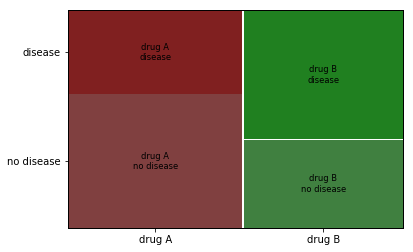

In [25]:
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

df_dict = {('drug A', 'no disease'): 80, ('drug A', 'disease'): 50, ('drug B', 'no disease'): 48, 
           ('drug B', 'disease'): 70}
mosaic(df_dict)  
plt.show()

#### Perform fisher’s exact
Fisher’s exact test可使用 SciPy 软件包中提供的 Fisher_exact 功能执行,

fisher_exact 函数接受以下两个参数:

table: A 2x2 contingency table of non-negative integers

alternative: Type of test to calculate p value (two-sided, less, or greater)

In [26]:
from scipy.stats import fisher_exact
oddsr, p = fisher_exact(table=df.to_numpy(), alternative='two-sided')
oddsr, p

(2.3333333333333335, 0.001425903669576289)

Fisher精确检验得出的p值（双尾）具有显著性[p=0.00142，优势比OR=2.33]具有统计学显著性（p<0.05），因此，我们拒绝了无效假设。因此，我们可以得出结论，药物治疗和疾病状态之间存在显著关联。

优势比（OR）可作为了解药物治疗效果和决策的效应大小。优势比表明，在接受药物治疗时没有疾病的几率是患病几率的2.33倍。换句话说，接受药物治疗的受试者比未接受治疗的受试者更容易得不到疾病。